# HW 4: Logistic Regression

## Importing libraries

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Dataset

In [0]:
# Load Iris dataset and find out what is in this dataset
iris = datasets.load_iris()
for key, value in iris.items():
    print(key)

data
target
target_names
DESCR
feature_names
filename


In [0]:
#what's in each of 
# target_names
# DESCR
# target
# feature_names
# data
# DESCR and target are shown below. 
# Continue to work out the rest by appending more cells below.

In [0]:
#See what is in data
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [0]:
#See what is in target names
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [0]:
#Let's see the description of this dataset?
iris['DESCR']

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [0]:
#See feature names
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [0]:
#See filepath
iris['filename']

'/usr/local/lib/python3.6/dist-packages/sklearn/datasets/data/iris.csv'

In [0]:
#What's in target?
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [0]:
#How many 0s, 1s, and 2s are in target?
import collections, numpy
collections.Counter(iris['target'])

Counter({0: 50, 1: 50, 2: 50})

## Using Logistic Regression for binary class classification

In [0]:
# Let's focus on data with only two classes ( the first 100 entries)
data_100 = iris.data[:100,:]
target_100 = iris.target[:100]
target_100

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [0]:
#check the size of data_100
data_100.shape

(100, 4)

## Standardize Features

In [0]:
#What's the mean and standard deviation of data_100 and target_100
print("The mean of data_100 is ", data_100.mean())
print("The standard deviation of data_100 is ", data_100.std())
print("The mean of target_100 is ", target_100.mean())
print("The standard deviation of target_100 is ", target_100.std())


The mean of data_100 is  3.05425
The standard deviation of data_100 is  1.8745617987945877
The mean of target_100 is  0.5
The standard deviation of target_100 is  0.5


In [0]:
scaler = StandardScaler()
# Transform the feature
data_100_standardized = scaler.fit_transform(data_100)

In [0]:
#what's the mean and standard deviation of the standardized data_100
print("The mean of data_100_standarized is ", data_100_standardized.mean())
print("The standard deviation of data_100_standarized is ", data_100_standardized.std())

The mean of data_100_standarized is  -1.1723955140041654e-15
The standard deviation of data_100_standarized is  0.9999999999999998


## Create Logistic Regression

In [0]:
#Let's create a dataframe table to store all the features
features = pd.DataFrame(data_100_standardized, columns=iris.feature_names)
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.581066,0.841837,-1.012978,-1.042111
1,-0.894309,-0.207835,-1.012978,-1.042111
2,-1.207552,0.212034,-1.082312,-1.042111
3,-1.364174,0.002099,-0.943643,-1.042111
4,-0.737687,1.051772,-1.012978,-1.042111


In [0]:
#Create another dataframe to store the target
target = pd.DataFrame(target_100, columns=['target'])

In [0]:
# let's combine these two 'tables' into one dataframe
df = pd.concat([features,target], axis=1)
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.581066,0.841837,-1.012978,-1.042111,0
1,-0.894309,-0.207835,-1.012978,-1.042111,0


In [0]:
#find out which is most correlated to the target?
df.corr().abs().target.sort_values(ascending=False)[1:]

petal length (cm)    0.969990
petal width (cm)     0.960307
sepal length (cm)    0.728290
sepal width (cm)     0.690684
Name: target, dtype: float64

**Petal length is the most correlated to the target**

In [0]:
# Create logistic regression object
LogReg = LogisticRegression()

## Train Logistic Regression

In [0]:
#Create (X,y) data pair ready for fitting the model
X = df[iris.feature_names]
y=df['target']

In [0]:
# Train model using the entire dataset
LogReg.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
# Add a column predictions to the df datagrame on the predicted values based on X
df['target_pred']=LogReg.predict(X)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_pred
0,-0.581066,0.841837,-1.012978,-1.042111,0,0
1,-0.894309,-0.207835,-1.012978,-1.042111,0,0
2,-1.207552,0.212034,-1.082312,-1.042111,0,0
3,-1.364174,0.002099,-0.943643,-1.042111,0,0
4,-0.737687,1.051772,-1.012978,-1.042111,0,0


In [0]:
#What's the score of using the entire dataset to train our Logistic Regression?
LogReg.score(X,y)

1.0

In [0]:
# probability of each class as validated against X
# probability of target =0 (We only need to check 0 and 1 because in target_100, there is only 0 and 1)
LogReg.predict_proba(X)[:,0]

array([9.89030983e-01, 9.71476553e-01, 9.87612030e-01, 9.82851619e-01,
       9.92415445e-01, 9.85775233e-01, 9.90215071e-01, 9.86310757e-01,
       9.80490169e-01, 9.80950103e-01, 9.89079877e-01, 9.88172711e-01,
       9.80708481e-01, 9.92462406e-01, 9.93644975e-01, 9.95016071e-01,
       9.90634595e-01, 9.85628542e-01, 9.79883156e-01, 9.92299470e-01,
       9.72302046e-01, 9.87126748e-01, 9.96995157e-01, 9.46480171e-01,
       9.83829890e-01, 9.60446635e-01, 9.74027723e-01, 9.86197784e-01,
       9.84160376e-01, 9.83066862e-01, 9.75613286e-01, 9.61672872e-01,
       9.97565275e-01, 9.96705994e-01, 9.75104177e-01, 9.83754714e-01,
       9.83693609e-01, 9.94905807e-01, 9.86188248e-01, 9.84487236e-01,
       9.88577237e-01, 8.95621532e-01, 9.91501023e-01, 9.65197792e-01,
       9.84666164e-01, 9.67117470e-01, 9.93481891e-01, 9.87868541e-01,
       9.90368816e-01, 9.84289760e-01, 4.41608610e-03, 8.84664214e-03,
       2.41967133e-03, 8.92325475e-03, 2.64259400e-03, 1.38548240e-02,
      

In [0]:
#Probability of target =1 (We only need to check 0 and 1 because in target_100, there is only 0 and 1)
LogReg.predict_proba(X)[:,1]

array([0.01096902, 0.02852345, 0.01238797, 0.01714838, 0.00758456,
       0.01422477, 0.00978493, 0.01368924, 0.01950983, 0.0190499 ,
       0.01092012, 0.01182729, 0.01929152, 0.00753759, 0.00635502,
       0.00498393, 0.00936541, 0.01437146, 0.02011684, 0.00770053,
       0.02769795, 0.01287325, 0.00300484, 0.05351983, 0.01617011,
       0.03955337, 0.02597228, 0.01380222, 0.01583962, 0.01693314,
       0.02438671, 0.03832713, 0.00243472, 0.00329401, 0.02489582,
       0.01624529, 0.01630639, 0.00509419, 0.01381175, 0.01551276,
       0.01142276, 0.10437847, 0.00849898, 0.03480221, 0.01533384,
       0.03288253, 0.00651811, 0.01213146, 0.00963118, 0.01571024,
       0.99558391, 0.99115336, 0.99758033, 0.99107675, 0.99735741,
       0.98614518, 0.99208862, 0.89495191, 0.99487021, 0.97112344,
       0.96960435, 0.98604827, 0.99158488, 0.99338886, 0.94985139,
       0.99307508, 0.98514645, 0.96751086, 0.99901291, 0.97571085,
       0.99463415, 0.98585551, 0.99881061, 0.99108096, 0.99095

In [0]:
#In df, append the target probability = 1 
df['target_pred_prob'] =  LogReg.predict_proba(X)[:,1]

Text(0, 0.5, 'target')

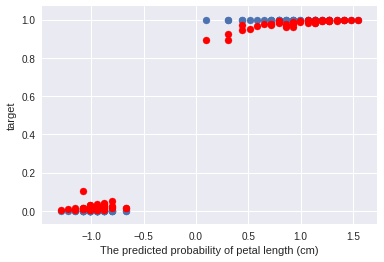

In [0]:
# scatter plot the petal length (cm) against y (the target)
# scatter plot on the same plot the petal length (cm) against the predicted probabilities in different color, e.g.,red. 
# target.sort_values('petal length (cm)', inplace=True)
df.sort_values('petal length (cm)', inplace=True)

plt.scatter(df['petal length (cm)'], df['target'])
plt.scatter(df['petal length (cm)'], df['target_pred_prob'] , color='red')
plt.xlabel('The predicted probability of petal length (cm)')
plt.ylabel('target')

##  Multi-class classification using Logistic Regression

In [0]:
#Load Iris dataset again
iris = datasets.load_iris()

In [0]:
#Standardize the dataset
scaler2 = StandardScaler()

# Transform the feature
standardized_data = scaler2.fit_transform(iris.data)

In [0]:
#create dataframes for data and target separately
data = pd.DataFrame(standardized_data, columns=iris.feature_names)
target = pd.DataFrame(iris.target, columns=['target'])

In [0]:
#Combine data and target into one big dataframe tables
df2=pd.concat([data, target], axis=1)
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


In [0]:
#check how many different values does target have?
df2.target.value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [0]:
#Create a new copy of Logistic Regression class
LogRegM = LogisticRegression()

In [0]:
#Define (X,y) to be used for training the model
X2=df2[iris.feature_names]
y2=df2['target']

In [0]:
#Fit the model with all the data
LogRegM.fit(X2, y2)
#Find out how well it scores
LogRegM.score(X2,y2)


print ("The logistic regression score is", LogRegM.score(X2,y2), "\n\n\n")

The regression score is 0.9266666666666666 





/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
#Show which ones (rows) the model fail to predict 
df2['target_pred']=LogRegM.predict(X2)

df2_failed=df2[(df2['target']!=df2['target_pred'])]
df2_failed

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_pred
51,0.674501,0.328414,0.421734,0.395774,1,2
52,1.280340,0.098217,0.649083,0.395774,1,2
56,0.553333,0.558611,0.535409,0.527406,1,2
70,0.068662,0.328414,0.592246,0.790671,1,2
77,1.038005,-0.131979,0.705921,0.659038,1,2
85,0.189830,0.788808,0.421734,0.527406,1,2
86,1.038005,0.098217,0.535409,0.395774,1,2
106,-1.143017,-1.282963,0.421734,0.659038,2,1
119,0.189830,-1.973554,0.705921,0.395774,2,1
133,0.553333,-0.592373,0.762758,0.395774,2,1


In [0]:
#Count how many rows failed to predict
df2_failed.shape

(11, 6)

In [0]:
#Show the predict_proba of those (rows) that the model failed to predict correctly. It should be some 3-column array similar to the following.
# array([[ 0.08409726,  0.39751511,  0.51838763],
#          ...,
#        [ 0.00318901,  0.58149374,  0.41531726]])
df2['target_pred_prob_0'] =  LogRegM.predict_proba(X2)[:,0]
df2['target_pred_prob_1'] =  LogRegM.predict_proba(X2)[:,1]
df2['target_pred_prob_2'] =  LogRegM.predict_proba(X2)[:,2]
df2_failed=df2[(df2['target']!=df2['target_pred'])]
df2_failed[['target_pred_prob_0', 'target_pred_prob_1', 'target_pred_prob_2']].values

array([[0.08375487, 0.39784828, 0.51839685],
       [0.01978252, 0.44861961, 0.53159786],
       [0.07673632, 0.27028352, 0.65298016],
       [0.03901089, 0.21106814, 0.74992098],
       [0.008308  , 0.36195146, 0.62974054],
       [0.17863756, 0.2056876 , 0.61567484],
       [0.03196963, 0.45545321, 0.51257715],
       [0.01364452, 0.52329445, 0.46306103],
       [0.00133352, 0.63614849, 0.36251799],
       [0.00822107, 0.53172499, 0.46005393],
       [0.00318708, 0.58278946, 0.41402346]])

In [0]:
#Examine the array you obtained in the output of the cell above.

df2_failed

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_pred,target_pred_prob_0,target_pred_prob_1,target_pred_prob_2
51,0.674501,0.328414,0.421734,0.395774,1,2,0.083755,0.397848,0.518397
52,1.280340,0.098217,0.649083,0.395774,1,2,0.019783,0.448620,0.531598
56,0.553333,0.558611,0.535409,0.527406,1,2,0.076736,0.270284,0.652980
70,0.068662,0.328414,0.592246,0.790671,1,2,0.039011,0.211068,0.749921
77,1.038005,-0.131979,0.705921,0.659038,1,2,0.008308,0.361951,0.629741
85,0.189830,0.788808,0.421734,0.527406,1,2,0.178638,0.205688,0.615675
86,1.038005,0.098217,0.535409,0.395774,1,2,0.031970,0.455453,0.512577
106,-1.143017,-1.282963,0.421734,0.659038,2,1,0.013645,0.523294,0.463061
119,0.189830,-1.973554,0.705921,0.395774,2,1,0.001334,0.636148,0.362518
133,0.553333,-0.592373,0.762758,0.395774,2,1,0.008221,0.531725,0.460054


**Do you see your trained model missed to predict the correct target by a lot/little? Explain your observation.**

The trained model missed to predict the correct target by a little. There are 11 rows are mispredicted over 150 data. The mispredict rate is around 7%.

Moreover, we see the logistic regression score 0.9267 or 0.93. This indicates that it is 93% accurate or has 7% mispredict. This matches our result from above.